### Importar librerias 

In [12]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
from scipy.stats import truncnorm

#### Leer Dataset

In [13]:
dfi = pd.read_csv('education_career_success.csv')
dfi

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


#### Tipos de datos

In [14]:
dfi.dtypes.tolist()



[dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O')]

In [15]:
dfi.columns = ['student_id', 'age', 'gender', 'high_school_gpa', 'sat_score', 'university_ranking', 'university_gpa', 
              'field_of_study', 'internship_completed', 'projects_completed', 'certifications', 'soft_skills_score',
              'networking_score', 'job_offers', 'starting_salary', 'career_satisfaction', 'years_to_promotion',
              'current_job_level', 'work_life_balance', 'entrepreneurship']

In [16]:
df = dfi.loc[:, ['age', 'gender', 'high_school_gpa', 'sat_score', 'university_ranking', 'university_gpa', 
              'field_of_study', 'internship_completed', 'projects_completed', 'certifications', 'soft_skills_score',
              'networking_score', 'job_offers', 'starting_salary', 'career_satisfaction', 'years_to_promotion',
               'work_life_balance']]

In [17]:
num_cols = []
for c in df.columns:
    if df[c].dtypes == 'int64' or df[c].dtypes == 'float64':
        num_cols.append( c )


In [18]:
cat_cols = []
for c in df.columns:
    if df[c].dtypes == 'O':
        cat_cols.append( c )


In [19]:
cat_cols

['gender', 'field_of_study']

In [20]:
# -------------------------------
#  ESTADÍSTICAS DEL DATASET COMPLETO 
# -------------------------------
print(" ESTADÍSTICAS DEL DATASET COMPLETO ")
print(df['starting_salary'].describe())
# -------------------------------
# ANÁLISIS POR 'pulisher' para tratar de verificar que tan bien o mal esta simulado el dataset
# -------------------------------

print("\n------------------------------------------------------------")
print("\n ANÁLISIS POR 'publisher' ")
print(" ESTADÍSTICAS PARA 'Nintendo' EN 'publisher'")
print(df[df['field_of_study'] == 'Arts']['starting_salary'].describe())


print("\n------------------------------------------------------------")
print(" ESTADÍSTICAS PARA 'activision' EN 'publisher'")
print(df[df['field_of_study'] == 'Law']['starting_salary'].describe())


 ESTADÍSTICAS DEL DATASET COMPLETO 
count      5000.000000
mean      50563.540000
std       14494.958207
min       25000.000000
25%       40200.000000
50%       50300.000000
75%       60500.000000
max      101000.000000
Name: starting_salary, dtype: float64

------------------------------------------------------------

 ANÁLISIS POR 'publisher' 
 ESTADÍSTICAS PARA 'Nintendo' EN 'publisher'
count       749.000000
mean      51422.830441
std       14323.288859
min       25000.000000
25%       41500.000000
50%       50700.000000
75%       61400.000000
max      101000.000000
Name: starting_salary, dtype: float64

------------------------------------------------------------
 ESTADÍSTICAS PARA 'activision' EN 'publisher'
count       727.000000
mean      50081.155433
std       14705.451091
min       25000.000000
25%       39700.000000
50%       49600.000000
75%       59750.000000
max      100600.000000
Name: starting_salary, dtype: float64


In [21]:
num_cols

['age',
 'high_school_gpa',
 'sat_score',
 'university_ranking',
 'university_gpa',
 'internship_completed',
 'projects_completed',
 'certifications',
 'soft_skills_score',
 'networking_score',
 'job_offers',
 'starting_salary',
 'career_satisfaction',
 'years_to_promotion',
 'work_life_balance']

In [22]:
cat_cols

['gender', 'field_of_study']

In [23]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "job_offers": ["count"]
})

prob_freq.columns = cat_cols + ["user"]

In [24]:
prob_freq.head(2)

,gender,field_of_study,user
0,Female,Arts,357
1,Female,Business,330


C:\Users\issac\AppData\Local\Temp\ipykernel_1788\776883965.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30, 15))


<Figure size 3000x1500 with 0 Axes>

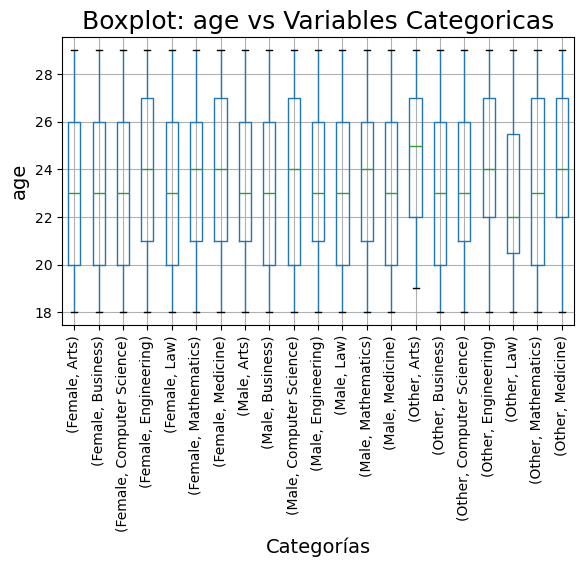

<Figure size 3000x1500 with 0 Axes>

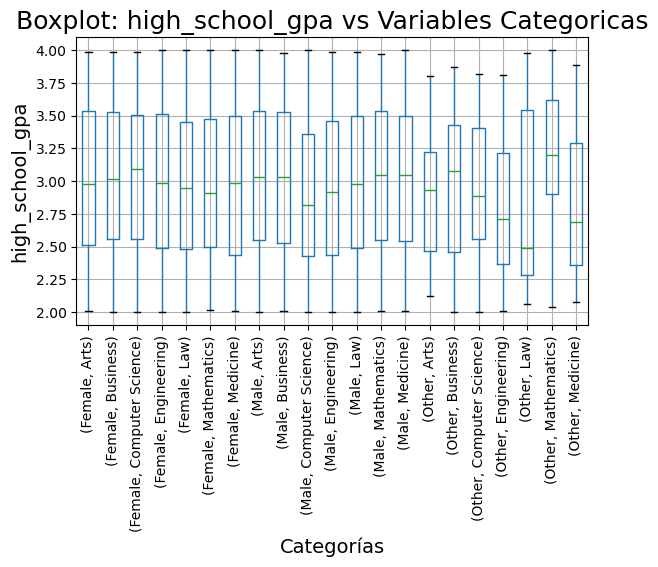

<Figure size 3000x1500 with 0 Axes>

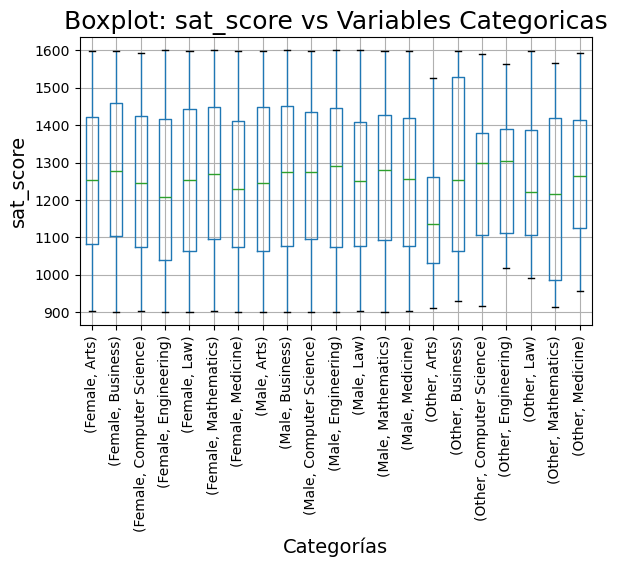

<Figure size 3000x1500 with 0 Axes>

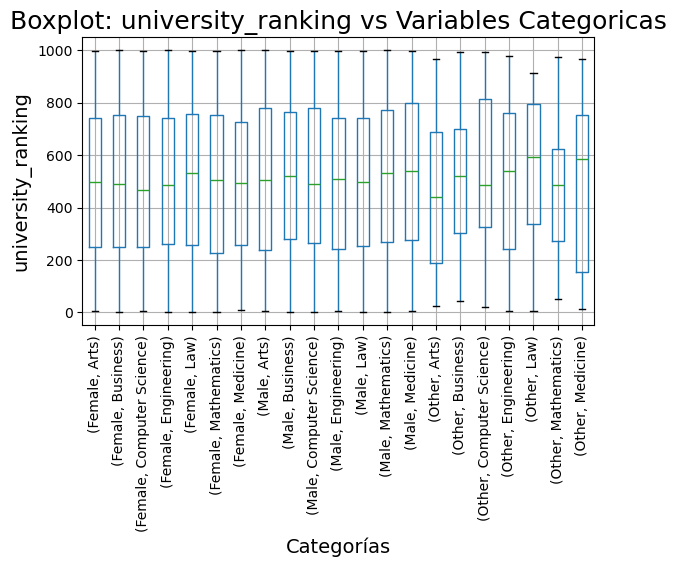

<Figure size 3000x1500 with 0 Axes>

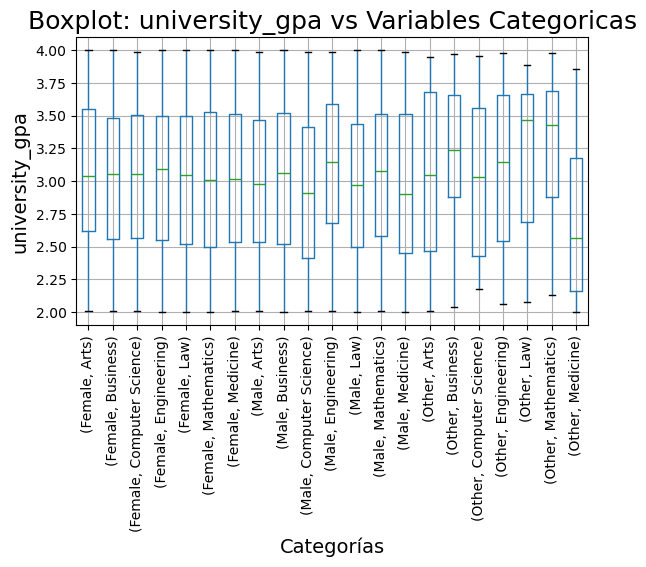

<Figure size 3000x1500 with 0 Axes>

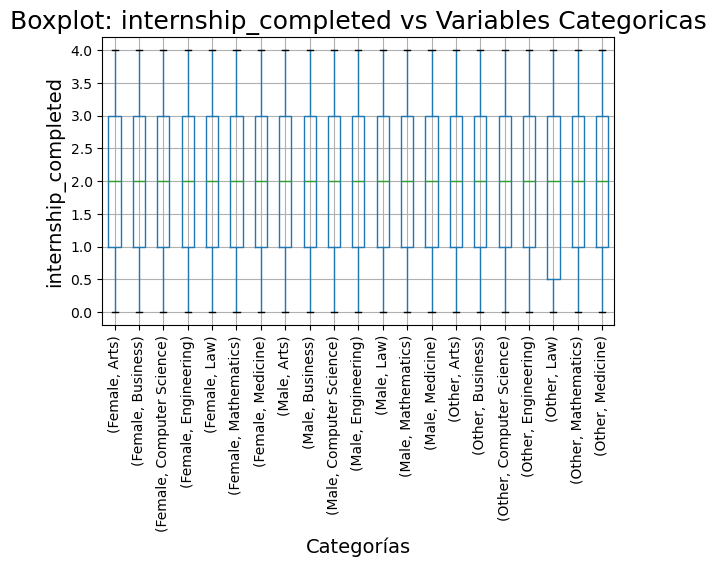

<Figure size 3000x1500 with 0 Axes>

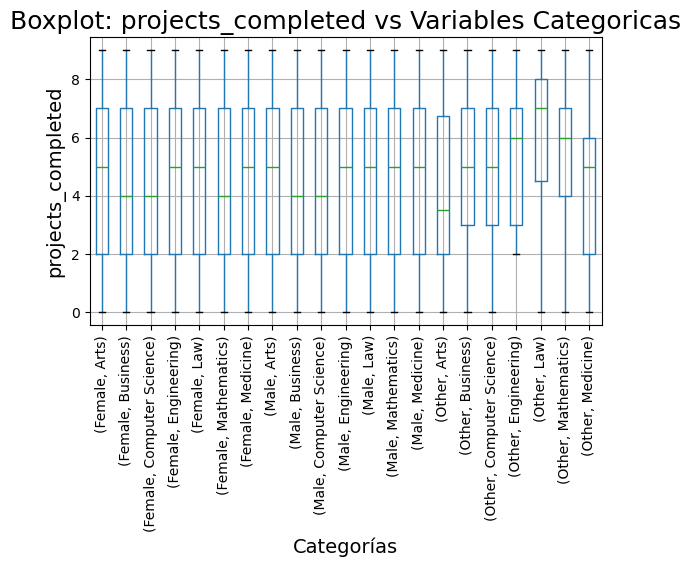

<Figure size 3000x1500 with 0 Axes>

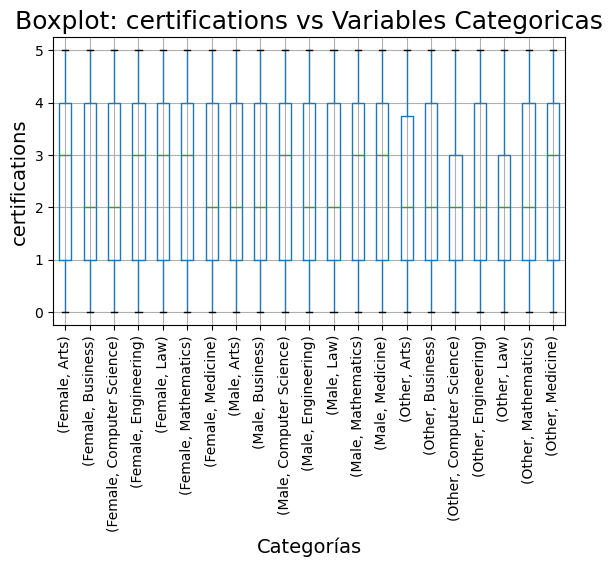

<Figure size 3000x1500 with 0 Axes>

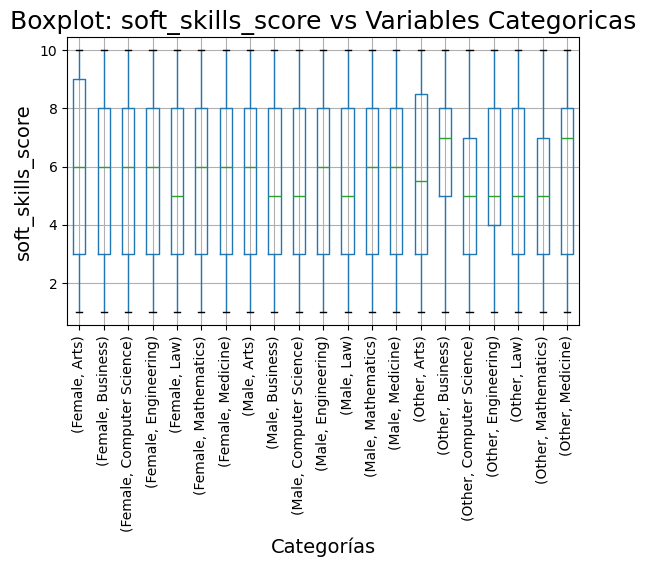

<Figure size 3000x1500 with 0 Axes>

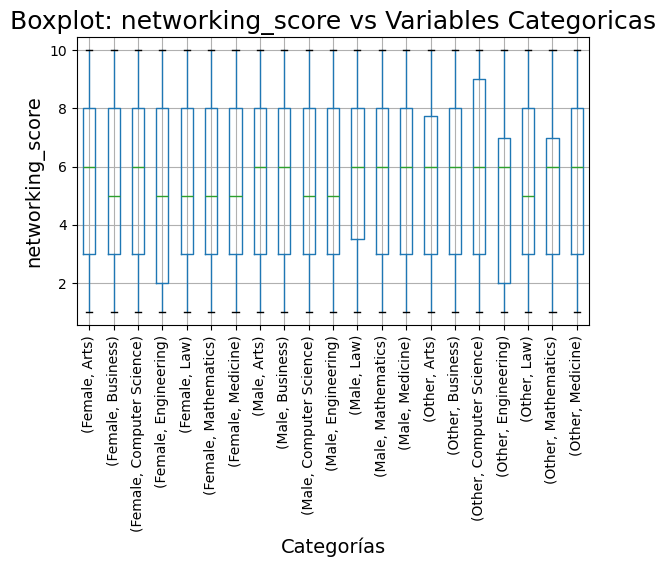

<Figure size 3000x1500 with 0 Axes>

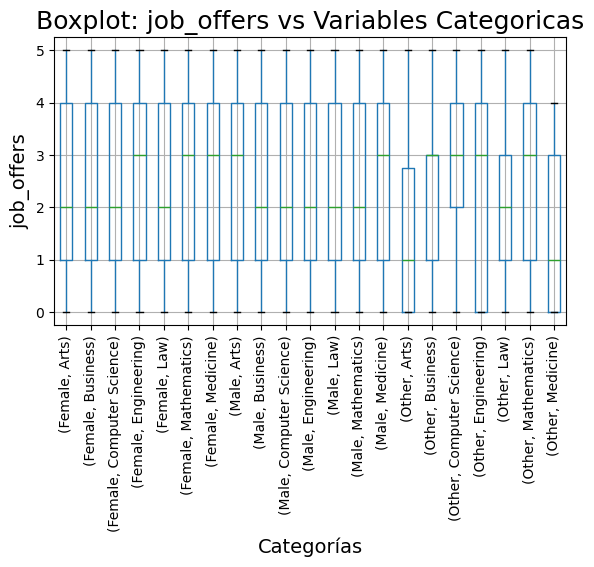

<Figure size 3000x1500 with 0 Axes>

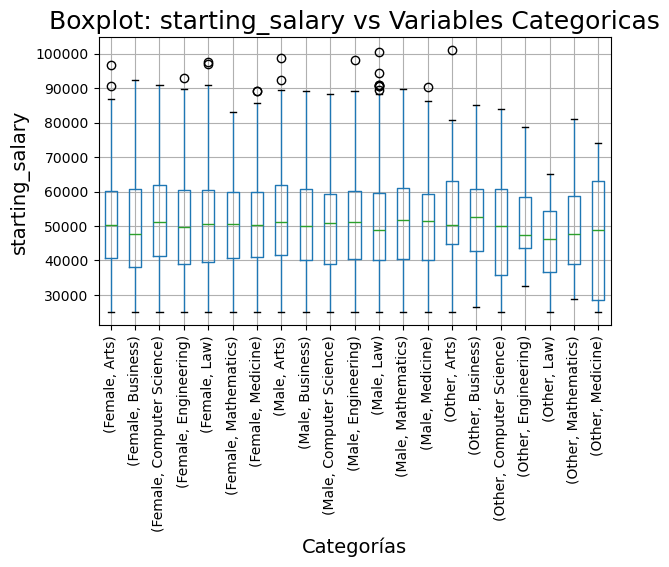

<Figure size 3000x1500 with 0 Axes>

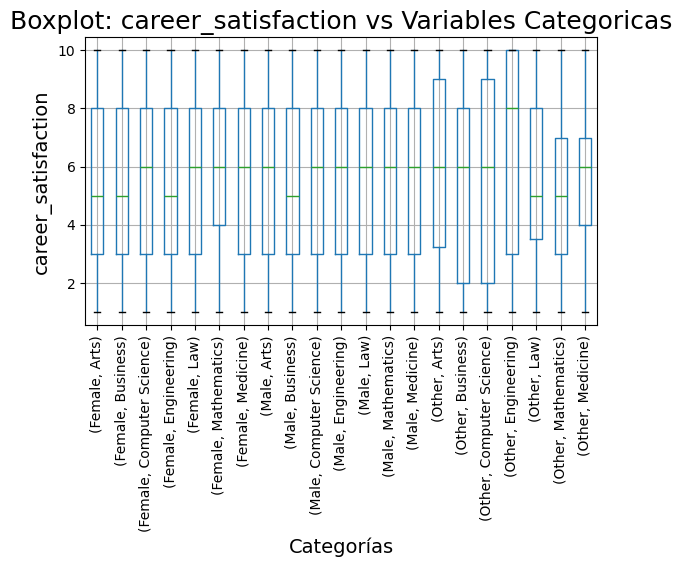

<Figure size 3000x1500 with 0 Axes>

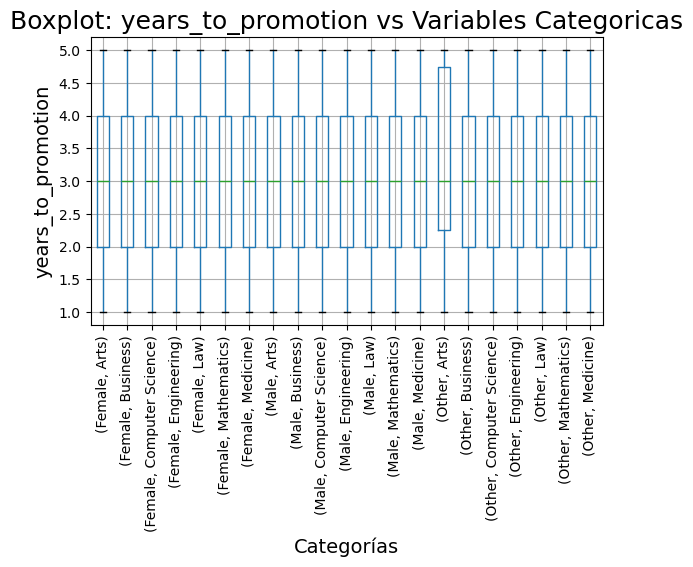

<Figure size 3000x1500 with 0 Axes>

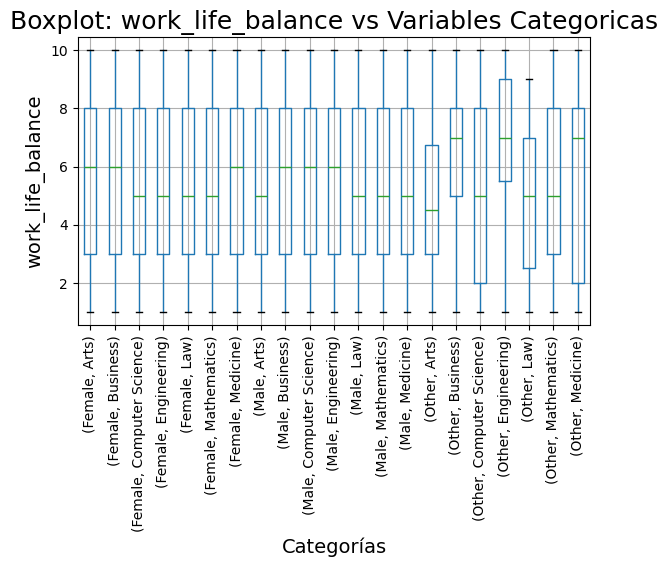

In [25]:
for num_col in num_cols:
    plt.figure(figsize=(30, 15))  
    
    # Crear el boxplot agrupando por las tres categorías
    df.boxplot(column=num_col, by=cat_cols)
    
    # Personalizar gráfico
    plt.title(f"Boxplot: {num_col} vs Variables Categoricas", fontsize=18)
    plt.suptitle('')  # Eliminar título automático
    plt.xlabel('Categorías', fontsize=14)
    plt.ylabel(num_col, fontsize=14)
    
    plt.xticks(rotation=90, fontsize=10)  # Rotar a 90° y reducir tamaño
    plt.grid(True)
    
    # Ajustar automáticamente los márgenes para evitar superposición
    plt.subplots_adjust(bottom=0.3)  


In [26]:
df.groupby(cat_cols, as_index=False).agg(count=("field_of_study", "count"))




,gender,field_of_study,count
0,Female,Arts,357
1,Female,Business,330
2,Female,Computer Science,314
3,Female,Engineering,322
4,Female,Law,361
5,Female,Mathematics,347
6,Female,Medicine,319
7,Male,Arts,370
8,Male,Business,364
9,Male,Computer Science,323


In [27]:
df.loc[
    (df["gender"]== "Female") & (df["field_of_study"] == "Medicine") & (df["current_job_level"] == "Executive")
    ,
    ["starting_salary"]
    ].boxplot()
plt.show()

KeyError: 'current_job_level'

In [ ]:
df.groupby(cat_cols, as_index=False).agg({
    'starting_salary': [
        ( 'lower_bound' , lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25))  ), 
        ( 'upper_bound' , lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25))  )
    ]
}).head(1)

gender field_of_study current_job_level starting_salary            
                                               lower_bound upper_bound
0  Female           Arts             Entry         14775.0     87375.0

### Diccionario para hacer dinamico el calculo de los lower bound y upper bound


In [ ]:
diccionario = {}
new_col = []
for i in num_cols:
    new_col.append(f"{i}_lower_bound")
    new_col.append(f"{i}_upper_bound")
    diccionario[i] = [
        ('lower_bound' , lambda x: x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))),
        ('upper_bound', lambda x: x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)))
    ]
    



In [ ]:
new_col

['age_lower_bound',
 'age_upper_bound',
 'high_school_gpa_lower_bound',
 'high_school_gpa_upper_bound',
 'sat_score_lower_bound',
 'sat_score_upper_bound',
 'university_ranking_lower_bound',
 'university_ranking_upper_bound',
 'university_gpa_lower_bound',
 'university_gpa_upper_bound',
 'internship_completed_lower_bound',
 'internship_completed_upper_bound',
 'projects_completed_lower_bound',
 'projects_completed_upper_bound',
 'certifications_lower_bound',
 'certifications_upper_bound',
 'soft_skills_score_lower_bound',
 'soft_skills_score_upper_bound',
 'networking_score_lower_bound',
 'networking_score_upper_bound',
 'job_offers_lower_bound',
 'job_offers_upper_bound',
 'starting_salary_lower_bound',
 'starting_salary_upper_bound',
 'career_satisfaction_lower_bound',
 'career_satisfaction_upper_bound',
 'years_to_promotion_lower_bound',
 'years_to_promotion_upper_bound',
 'work_life_balance_lower_bound',
 'work_life_balance_upper_bound']

In [ ]:
df_final = df.groupby( cat_cols, as_index = False).agg(
    diccionario
)

In [ ]:
df_final

gender field_of_study current_job_level         age              \
                                            lower_bound upper_bound   
0   Female           Arts             Entry      11.000      35.000   
1   Female           Arts         Executive      13.375      36.375   
2   Female           Arts               Mid       9.500      37.500   
3   Female           Arts            Senior      13.500      33.500   
4   Female       Business             Entry       9.500      37.500   
..     ...            ...               ...         ...         ...   
78   Other    Mathematics            Senior      13.250      31.250   
79   Other       Medicine             Entry      10.000      38.000   
80   Other       Medicine         Executive      21.000      21.000   
81   Other       Medicine               Mid      17.000      33.000   
82   Other       Medicine            Senior      14.250      32.250   

   high_school_gpa               sat_score             university_ranking  \
       lower_bound upper_bound lower_bound upper_bound        lower_bound   
0           1.2400      4.8000     586.500    1910.500           -449.250   
1           1.0800      5.4400     497.125    2090.125           -287.125   
2           0.6775      5.2975     560.500    1944.500           -401.250   
3           1.4700      4.3500     587.000    1955.000           -414.500   
4           1.1200      4.8800     696.500    1908.500           -479.000   
..             ...         ...         ...         ...                ...   
78          1.4875      4.6275     743.750    1289.750              2.000   
79          1.1450      4.3850     765.750    1827.750           -824.500   
80          2.3300      2.3300    1034.000    1034.000            155.000   
81          0.7950      5.0350     645.000    1803.000           -722.250   
82          1.2300      4.5900    1019.750    1617.750            -62.250   

    ...  job_offers             starting_salary              \
    ... lower_bound upper_bound     lower_bound upper_bound   
0   ...        -3.5         8.5         14775.0     87375.0   
1   ...        -3.5         8.5         11500.0     92900.0   
2   ...        -3.5         8.5          7975.0     90175.0   
3   ...        -3.5         8.5         16200.0     89800.0   
4   ...        -3.5         8.5          8300.0     92300.0   
..  ...         ...         ...             ...         ...   
78  ...        -1.5         6.5         29300.0     96500.0   
79  ...        -2.0         6.0          -975.0    102425.0   
80  ...         3.0         3.0         32000.0     32000.0   
81  ...        -3.0         5.0        -27062.5    121237.5   
82  ...        -1.0         3.0          8775.0     56575.0   

   career_satisfaction             years_to_promotion              \
           lower_bound upper_bound        lower_bound upper_bound   
0               -4.500      15.500             -1.000       7.000   
1               -4.125      14.875             -1.000       7.000   
2               -4.500      15.500             -1.000       7.000   
3               -4.500      15.500             -1.000       7.000   
4               -3.000      13.000             -1.000       7.000   
..                 ...         ...                ...         ...   
78              -1.250       8.750              4.000       4.000   
79              -2.000      14.000             -1.000       7.000   
80               5.000       5.000              5.000       5.000   
81               1.500      11.500             -0.375       6.625   
82               1.000       9.000              3.250       5.250   

   work_life_balance              
         lower_bound upper_bound  
0              -3.00       13.00  
1              -6.00       16.00  
2              -4.50       15.50  
3              -3.50       16.50  
4              -4.50       15.50  
..               ...         ...  
78              3.00        7.00  
79             -6.25       15.75  
80        

In [ ]:
df_final.groupby(cat_cols, as_index=False).head(1)


gender field_of_study current_job_level         age              \
                                            lower_bound upper_bound   
0   Female           Arts             Entry      11.000      35.000   
1   Female           Arts         Executive      13.375      36.375   
2   Female           Arts               Mid       9.500      37.500   
3   Female           Arts            Senior      13.500      33.500   
4   Female       Business             Entry       9.500      37.500   
..     ...            ...               ...         ...         ...   
78   Other    Mathematics            Senior      13.250      31.250   
79   Other       Medicine             Entry      10.000      38.000   
80   Other       Medicine         Executive      21.000      21.000   
81   Other       Medicine               Mid      17.000      33.000   
82   Other       Medicine            Senior      14.250      32.250   

   high_school_gpa               sat_score             university_ranking  \
       lower_bound upper_bound lower_bound upper_bound        lower_bound   
0           1.2400      4.8000     586.500    1910.500           -449.250   
1           1.0800      5.4400     497.125    2090.125           -287.125   
2           0.6775      5.2975     560.500    1944.500           -401.250   
3           1.4700      4.3500     587.000    1955.000           -414.500   
4           1.1200      4.8800     696.500    1908.500           -479.000   
..             ...         ...         ...         ...                ...   
78          1.4875      4.6275     743.750    1289.750              2.000   
79          1.1450      4.3850     765.750    1827.750           -824.500   
80          2.3300      2.3300    1034.000    1034.000            155.000   
81          0.7950      5.0350     645.000    1803.000           -722.250   
82          1.2300      4.5900    1019.750    1617.750            -62.250   

    ...  job_offers             starting_salary              \
    ... lower_bound upper_bound     lower_bound upper_bound   
0   ...        -3.5         8.5         14775.0     87375.0   
1   ...        -3.5         8.5         11500.0     92900.0   
2   ...        -3.5         8.5          7975.0     90175.0   
3   ...        -3.5         8.5         16200.0     89800.0   
4   ...        -3.5         8.5          8300.0     92300.0   
..  ...         ...         ...             ...         ...   
78  ...        -1.5         6.5         29300.0     96500.0   
79  ...        -2.0         6.0          -975.0    102425.0   
80  ...         3.0         3.0         32000.0     32000.0   
81  ...        -3.0         5.0        -27062.5    121237.5   
82  ...        -1.0         3.0          8775.0     56575.0   

   career_satisfaction             years_to_promotion              \
           lower_bound upper_bound        lower_bound upper_bound   
0               -4.500      15.500             -1.000       7.000   
1               -4.125      14.875             -1.000       7.000   
2               -4.500      15.500             -1.000       7.000   
3               -4.500      15.500             -1.000       7.000   
4               -3.000      13.000             -1.000       7.000   
..                 ...         ...                ...         ...   
78              -1.250       8.750              4.000       4.000   
79              -2.000      14.000             -1.000       7.000   
80               5.000       5.000              5.000       5.000   
81               1.500      11.500             -0.375       6.625   
82               1.000       9.000              3.250       5.250   

   work_life_balance              
         lower_bound upper_bound  
0              -3.00       13.00  
1              -6.00       16.00  
2              -4.50       15.50  
3              -3.50       16.50  
4              -4.50       15.50  
..               ...         ...  
78              3.00        7.00  
79             -6.25       15.75  
80        

In [ ]:
df_final.columns = cat_cols + new_col

In [ ]:
df_final

,gender,field_of_study,current_job_level,age_lower_bound,age_upper_bound,high_school_gpa_lower_bound,high_school_gpa_upper_bound,sat_score_lower_bound,sat_score_upper_bound,university_ranking_lower_bound,...,job_offers_lower_bound,job_offers_upper_bound,starting_salary_lower_bound,starting_salary_upper_bound,career_satisfaction_lower_bound,career_satisfaction_upper_bound,years_to_promotion_lower_bound,years_to_promotion_upper_bound,work_life_balance_lower_bound,work_life_balance_upper_bound
0,Female,Arts,Entry,11.000,35.000,1.2400,4.8000,586.500,1910.500,-449.250,...,-3.5,8.5,14775.0,87375.0,-4.500,15.500,-1.000,7.000,-3.00,13.00
1,Female,Arts,Executive,13.375,36.375,1.0800,5.4400,497.125,2090.125,-287.125,...,-3.5,8.5,11500.0,92900.0,-4.125,14.875,-1.000,7.000,-6.00,16.00
2,Female,Arts,Mid,9.500,37.500,0.6775,5.2975,560.500,1944.500,-401.250,...,-3.5,8.5,7975.0,90175.0,-4.500,15.500,-1.000,7.000,-4.50,15.50
3,Female,Arts,Senior,13.500,33.500,1.4700,4.3500,587.000,1955.000,-414.500,...,-3.5,8.5,16200.0,89800.0,-4.500,15.500,-1.000,7.000,-3.50,16.50
4,Female,Business,Entry,9.500,37.500,1.1200,4.8800,696.500,1908.500,-479.000,...,-3.5,8.5,8300.0,92300.0,-3.000,13.000,-1.000,7.000,-4.50,15.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Other,Mathematics,Senior,13.250,31.250,1.4875,4.6275,743.750,1289.750,2.000,...,-1.5,6.5,29300.0,96500.0,-1.250,8.750,4.000,4.000,3.00,7.00
79,Other,Medicine,Entry,10.000,38.000,1.1450,4.3850,765.750,1827.750,-824.500,...,-2.0,6.0,-975.0,102425.0,-2.000,14.000,-1.000,7.000,-6.25,15.75
80,Other,Medicine,Executive,21.000,21.000,2.3300,2.3300,1034.000,1034.000,155.000,...,3.0,3.0,32000.0,32000.0,5.000,5.000,5.000,5.000,5.00,5.00
81,Other,Medicine,Mid,17.000,33.000,0.7950,5.0350,645.000,1803.000,-722.250,...,-3.0,5.0,-27062.5,121237.5,1.500,11.500,-0.375,6.625,-6.75,15.25


In [ ]:
df_merge = df.merge(
    df_final,
    on = cat_cols,
    how = 'inner'
)

In [ ]:
for i in num_cols:
    df_merge = df_merge.loc[
        (df_merge[i] <= df_merge[f'{i}_upper_bound'])&(df_merge[i] >= df_merge[f'{i}_lower_bound']), :
        ]
    


In [ ]:
df_merge

,age,gender,high_school_gpa,sat_score,university_ranking,university_gpa,field_of_study,internship_completed,projects_completed,certifications,...,job_offers_lower_bound,job_offers_upper_bound,starting_salary_lower_bound,starting_salary_upper_bound,career_satisfaction_lower_bound,career_satisfaction_upper_bound,years_to_promotion_lower_bound,years_to_promotion_upper_bound,work_life_balance_lower_bound,work_life_balance_upper_bound
0,24,Male,3.58,1052,291,3.96,Arts,3,7,2,...,-3.5,8.5,11462.5,90162.5,-2.000,14.000,-1.0,7.0,-4.50,15.50
2,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,...,-3.5,8.5,13662.5,87962.5,-4.500,15.500,-1.0,7.0,-7.00,17.00
3,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,...,-3.5,8.5,3862.5,90962.5,-2.000,14.000,-2.5,9.5,-3.50,16.50
4,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,...,-3.5,8.5,12250.0,86250.0,-2.000,14.000,-1.0,7.0,-4.50,15.50
5,24,Male,2.40,1600,631,3.78,Law,2,3,2,...,-3.5,8.5,9825.0,91225.0,-4.500,15.500,-1.0,7.0,-3.75,14.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26,Female,2.44,1258,776,2.44,Arts,3,7,3,...,-3.5,8.5,7975.0,90175.0,-4.500,15.500,-1.0,7.0,-4.50,15.50
4996,18,Female,3.94,1032,923,3.73,Law,0,9,3,...,-3.5,8.5,8600.0,94200.0,-6.000,18.000,-1.0,7.0,-7.00,17.00
4997,19,Female,3.45,1299,720,2.52,Law,3,5,5,...,-3.5,8.5,4500.0,93700.0,-3.250,14.750,-2.5,9.5,-3.25,14.75
4998,19,Male,2.70,1038,319,3.94,Law,1,4,5,...,-3.5,8.5,9825.0,91225.0,-4.500,15.500,-1.0,7.0,-3.75,14.25


In [ ]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "job_offers": ["count"]
})

prob_freq.columns = cat_cols + ["user"]

NameError: name 'df' is not defined